# Image Transformation on baboon

Pixel Transforms are operations you perform one pixel at a time. In this task, you will start by creating histograms. Histograms display the intensity of the image and can be used to optimize image characteristics. You will then apply Intensity Transformations, making objects easier to see by improving image contrast and brightness.

#### Load the RGB image baboon.png

In [20]:
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt

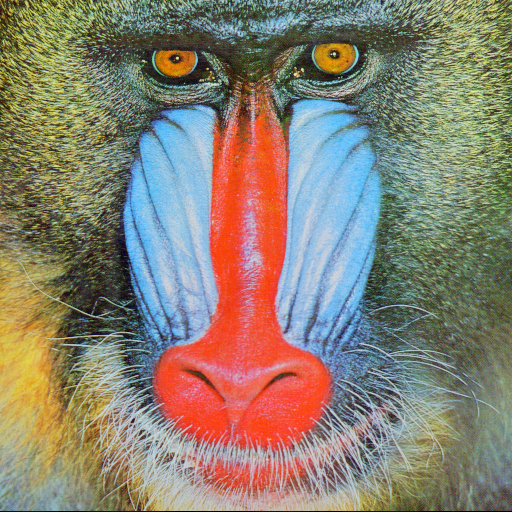

In [30]:
img_pil = Image.open(r"C:\Users\bbuser\Desktop\baboon.png")
img_pil

#### Create and display histograms for each color channel (Red, Green, Blue)

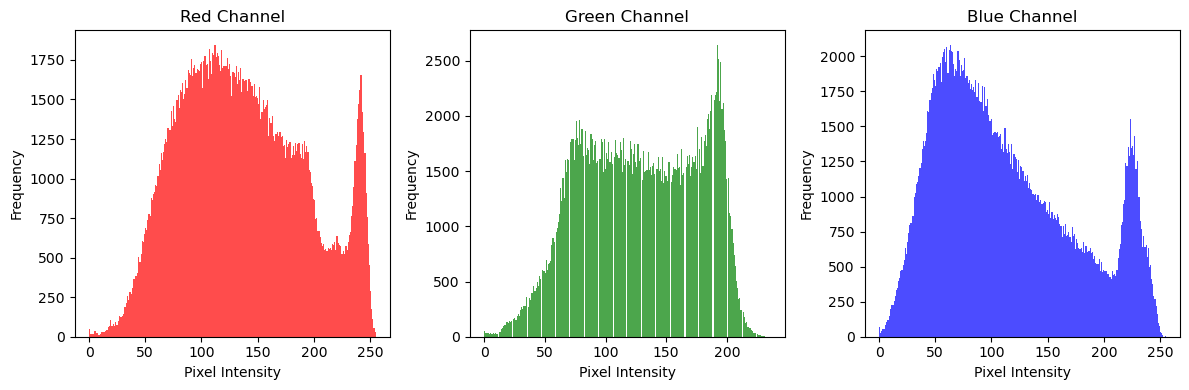

In [15]:
# Convert PIL image to numpy array
img_np = np.array(img_pil)

plt.figure(figsize=(12, 4))

# Red channel histogram
plt.subplot(1, 3, 1)
plt.hist(img_np[:, :, 0].ravel(), bins=256, color='red', alpha=0.7)
plt.title('Red Channel')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Green channel histogram
plt.subplot(1, 3, 2)
plt.hist(img_np[:, :, 1].ravel(), bins=256, color='green', alpha=0.7)
plt.title('Green Channel')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Blue channel histogram
plt.subplot(1, 3, 3)
plt.hist(img_np[:, :, 2].ravel(), bins=256, color='blue', alpha=0.7)
plt.title('Blue Channel')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#### Apply intensity transformations to enhance image contrast and brightness.

In [16]:
# Enhance brightness by adding a constant value and clipping to [0, 255]
brightness_increase = 50
img_bright = np.clip(img_np + brightness_increase, 0, 255).astype(np.uint8)

# Enhance contrast by scaling pixel values around the mean
mean = np.mean(img_np, axis=(0, 1), keepdims=True)
contrast_factor = 1.5
img_contrast = np.clip((img_np - mean) * contrast_factor + mean, 0, 255).astype(np.uint8)

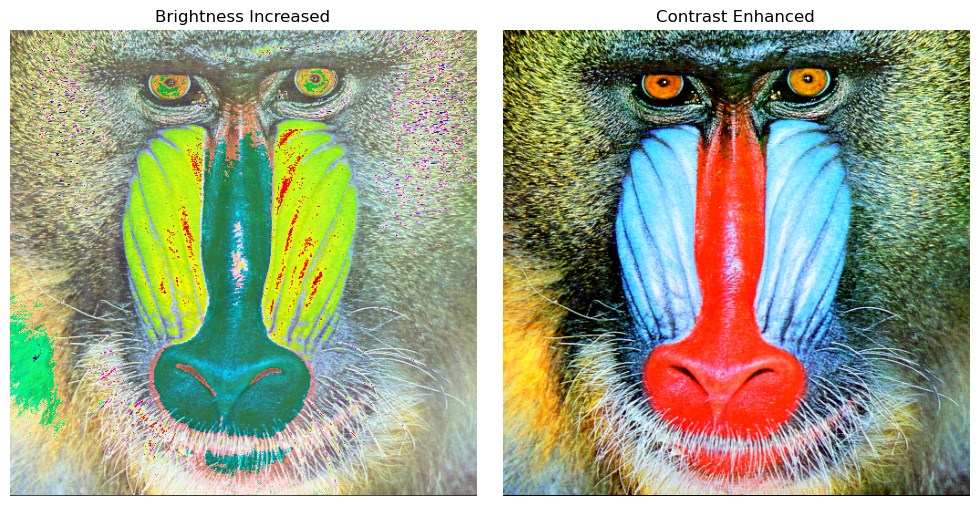

In [17]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_bright)
plt.title('Brightness Increased')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_contrast)
plt.title('Contrast Enhanced')
plt.axis('off')

plt.tight_layout()
plt.show()

#### Adjust brightness and contrast with chosen transformation functions.

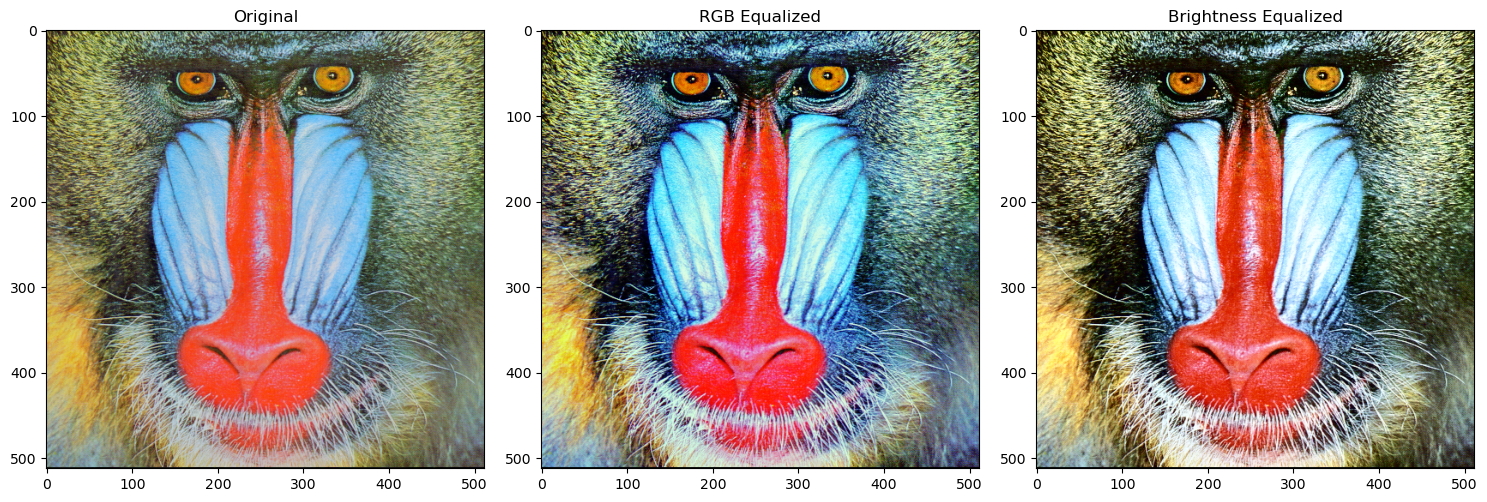

In [ ]:
# Histogram equalization on each color channel
red, green, blue = cv2.split(img_np)
red_fixed = cv2.equalizeHist(red)
green_fixed = cv2.equalizeHist(green)
blue_fixed = cv2.equalizeHist(blue)
rgb_fixed = cv2.merge([red_fixed, green_fixed, blue_fixed])

# Histogram equalization on brightness only (Y channel)
ycrcb = cv2.cvtColor(img_np, cv2.COLOR_RGB2YCrCb)
y, cr, cb = cv2.split(ycrcb)
y_fixed = cv2.equalizeHist(y)
ycrcb_fixed = cv2.merge([y_fixed, cr, cb])
brightness_fixed = cv2.cvtColor(ycrcb_fixed, cv2.COLOR_YCrCb2RGB)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img_np)
plt.title('Original')

plt.subplot(1, 3, 2)
plt.imshow(rgb_fixed)
plt.title('RGB Equalized')

plt.subplot(1, 3, 3)
plt.imshow(brightness_fixed)
plt.title('Brightness Equalized')

plt.tight_layout()
plt.show()

#### Perform histogram equalization on each channel.

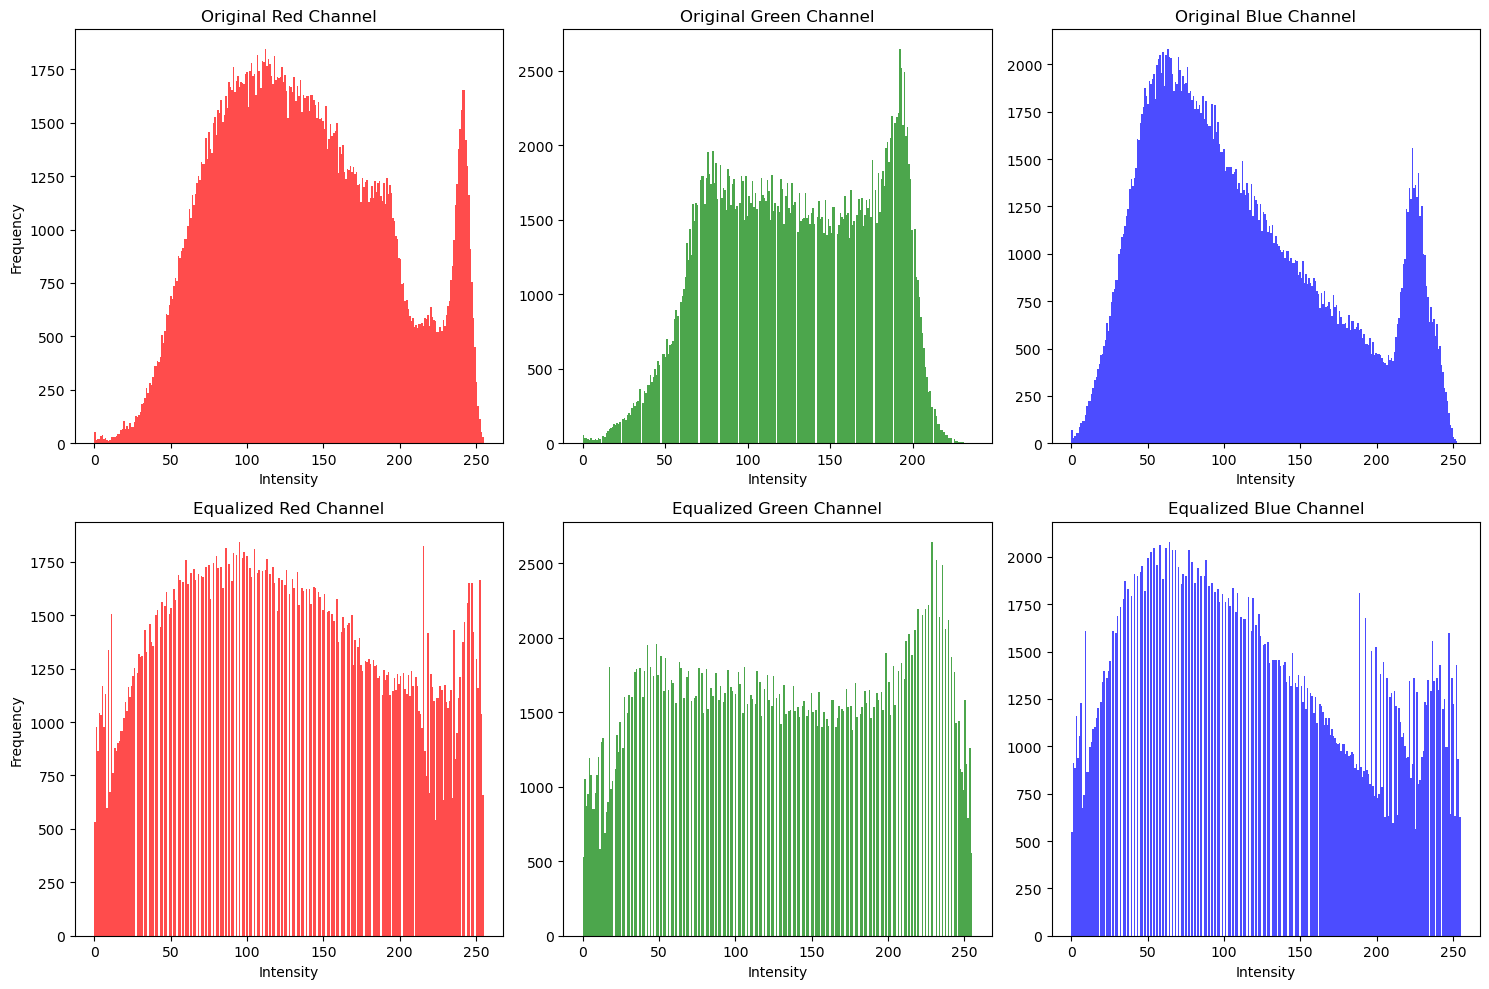

In [34]:
plt.figure(figsize=(15, 10))

# Original histograms
plt.subplot(2, 3, 1)
plt.hist(red.ravel(), bins=256, color='red', alpha=0.7)
plt.title('Original Red Channel')
plt.xlabel('Intensity')
plt.ylabel('Frequency')

plt.subplot(2, 3, 2)
plt.hist(green.ravel(), bins=256, color='green', alpha=0.7)
plt.title('Original Green Channel')
plt.xlabel('Intensity')

plt.subplot(2, 3, 3)
plt.hist(blue.ravel(), bins=256, color='blue', alpha=0.7)
plt.title('Original Blue Channel')
plt.xlabel('Intensity')

# Equalized histograms
plt.subplot(2, 3, 4)
plt.hist(red_fixed.ravel(), bins=256, color='red', alpha=0.7)
plt.title('Equalized Red Channel')
plt.xlabel('Intensity')
plt.ylabel('Frequency')

plt.subplot(2, 3, 5)
plt.hist(green_fixed.ravel(), bins=256, color='green', alpha=0.7)
plt.title('Equalized Green Channel')
plt.xlabel('Intensity')

plt.subplot(2, 3, 6)
plt.hist(blue_fixed.ravel(), bins=256, color='blue', alpha=0.7)
plt.title('Equalized Blue Channel')
plt.xlabel('Intensity')

plt.tight_layout()
plt.show()

#### Convert the image to grayscale and create its histogram.

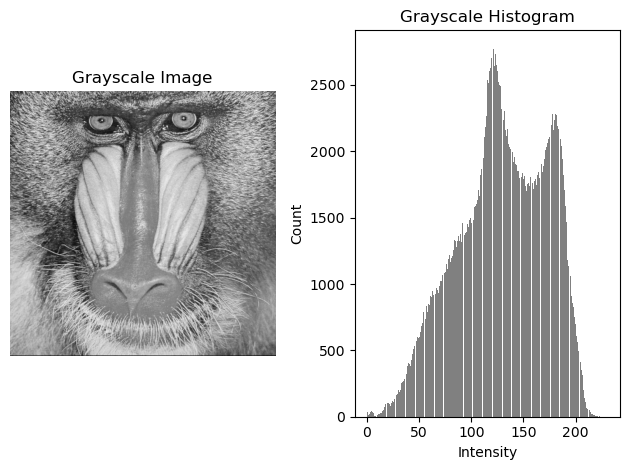

In [25]:
# Convert to grayscale by taking mean of RGB channels
img_gray = cv2.cvtColor(img_np, cv2.COLOR_RGB2GRAY)

# Create figure with two subplots
plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.hist(img_gray.ravel(), bins=256, color='gray')
plt.title('Grayscale Histogram')
plt.xlabel('Intensity')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

#### Apply Otsu’s thresholding to segment objects from the grayscale image.

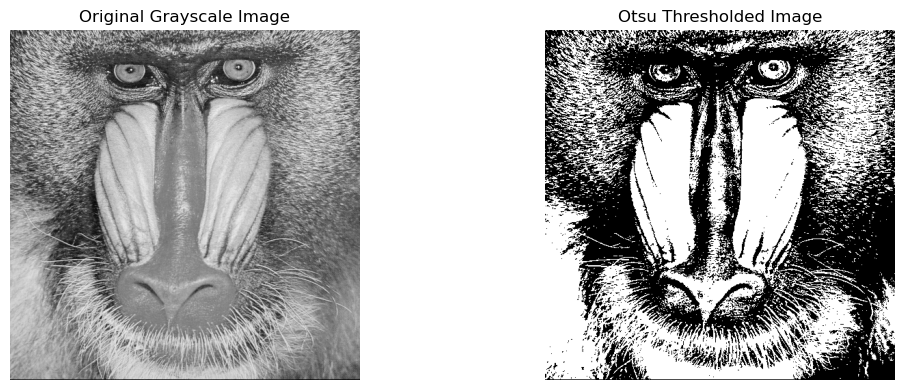

In [35]:
# Apply Otsu's thresholding
_, otsu_threshold = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display original grayscale and thresholded images side by side
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(otsu_threshold, cmap='gray')
plt.title('Otsu Thresholded Image')
plt.axis('off')

plt.tight_layout()
plt.show()